<a href="https://colab.research.google.com/github/kislay960/Data-Science-Practice/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))
    plt.show()

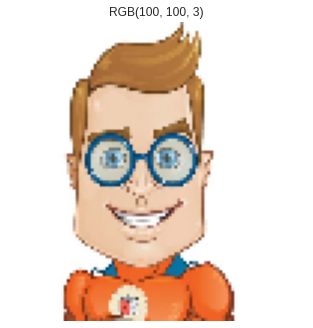

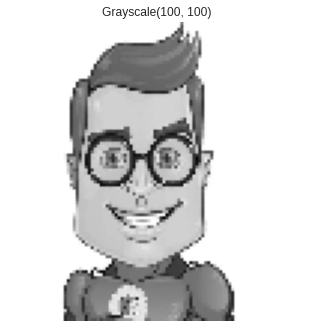

In [9]:
img_ = cv2.imread("/content/cody.jpg") #BGR
img_ = cv2.resize(img_,(100,100))
img = cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
drawImg(img,"RGB")
drawImg(img_gray,"Grayscale")

In [10]:
def convolution(img,img_filter):
    W = img.shape[0]
    H = img.shape[1]

    F = img_filter.shape[0]

    #convolution is the method of getting an activation map by applying a filter over an entire image

    new_img = np.zeros((W-F+1,H-F+1))
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col] += img[row+i][col+j]*img_filter[i][j]

                if new_img[row][col] > 255:
                    new_img[row][col] = 255
                
                elif new_img[row][col] < 0:
                    new_img[row][col] = 0

    return new_img

In [11]:
blur_filter = np.ones((3,3))/9.0
output = convolution(img_gray,blur_filter)

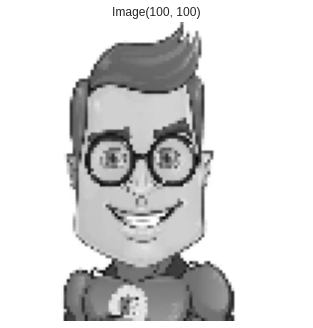

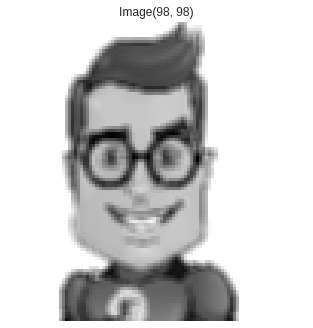

In [12]:
drawImg(img_gray)
drawImg(output)

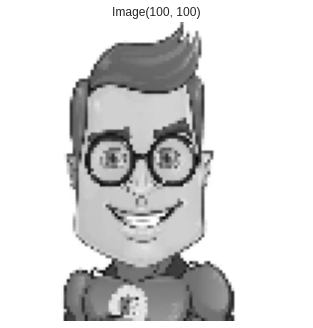

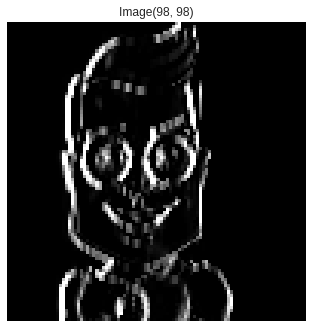

In [13]:
edge_filter = np.array([[1,0,-1],
                       [1,0,-1],
                       [1,0,-1]])

output2 = convolution(img_gray,edge_filter)
drawImg(img_gray)
drawImg(output2)

(100, 100, 3)


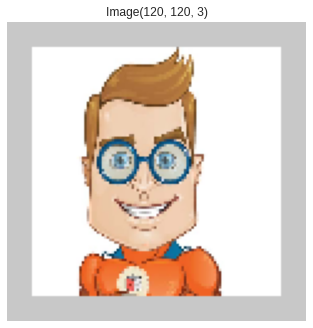

In [14]:
print(img.shape)
#drawImg(img)

#Padding to this image
pad_img = np.pad(img,((10,10),(10,10),(0,0)),'constant',constant_values=200)
drawImg(pad_img)

In [15]:
X = np.array([[1,0,2,3],
              [4,6,6,8],
              [3,1,1,0],
              [1,2,2,4]])

def pooling(X,mode="max"):
    stride = 2
    f = 2
    H,W = X.shape
    
    HO = int((H-f)/stride) + 1
    WO = int((W-f)/stride) + 1
    
    output = np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start = r*stride
            r_end = r_start + f
            c_start = c*stride
            c_end = c_start + f
            
            X_slice = X[r_start:r_end,c_start:c_end]
            if mode=="max":
                output[r][c] = np.max(X_slice)
            else:
                output[r][c] = np.mean(X_slice)
                
    return output

In [16]:
pooling_output = pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]
